<a href="https://colab.research.google.com/github/chauhan231405/DVLAB/blob/main/DataVisualizationLab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt

In [ ]:
# Read the airports dataset with latitude and longitude
airports = pd.read_csv('airports.csv')
airports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total RF Heliport,40.070985,-74.933689,11.0,NaN,US,US-PA,Bensalem,no,K00A,NaN,00A,https://www.penndot.pa.gov/TravelInPA/airports...,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,506791,00AN,small_airport,Katmai Lodge Airport,59.093287,-156.456699,80.0,NaN,US,US-AK,King Salmon,no,00AN,NaN,00AN,NaN,NaN,NaN


In [ ]:
airports.count()

id                   77700
ident                77700
type                 77700
name                 77700
latitude_deg         77700
longitude_deg        77700
elevation_ft         63144
continent            40408
iso_country          77441
iso_region           77700
municipality         72823
scheduled_service    77700
gps_code             41804
iata_code             8901
local_code           32963
home_link             3751
wikipedia_link       11125
keywords             17645
dtype: int64

<ipython-input-8-88a507df28f8>:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


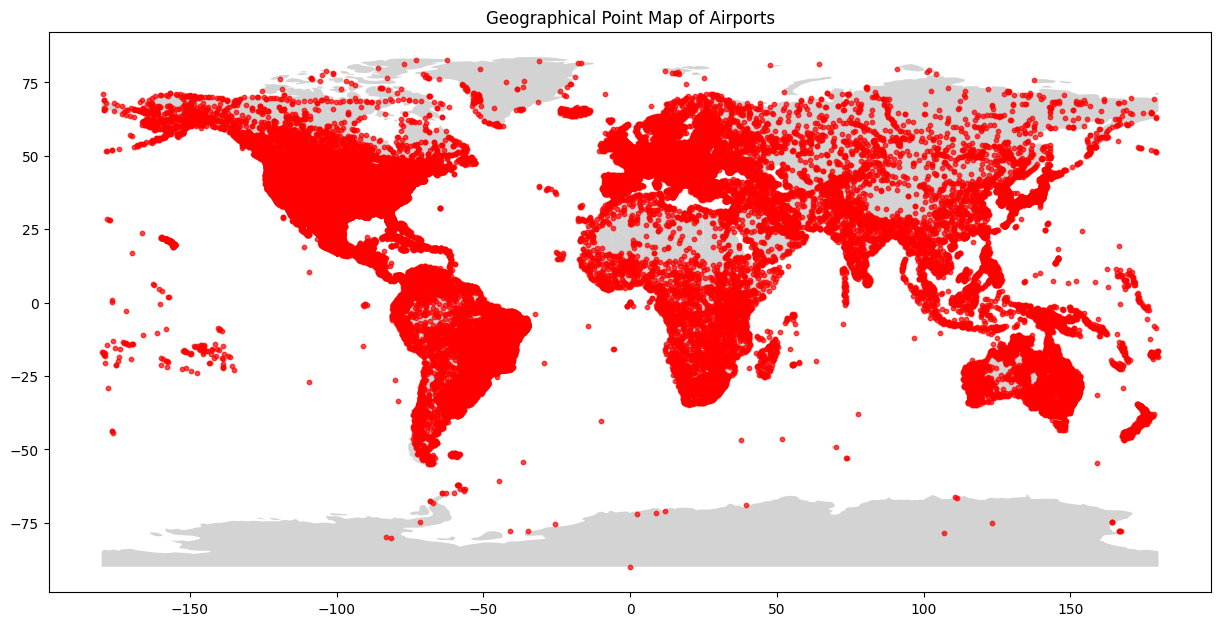

In [ ]:
# Filter out rows with missing or invalid latitude or longitude
airports = airports.dropna(subset=['latitude_deg', 'longitude_deg'])

# Create a GeoDataFrame with Point geometry
geometry = [Point(xy) for xy in zip(airports['longitude_deg'], airports['latitude_deg'])]
geo_airports = gpd.GeoDataFrame(airports, geometry=geometry)

# Load world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the geographical point map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
geo_airports.plot(ax=ax, markersize=10, color='red', alpha=0.7)
plt.title('Geographical Point Map of Airports')
plt.show()

<ipython-input-9-76096a464846>:32: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


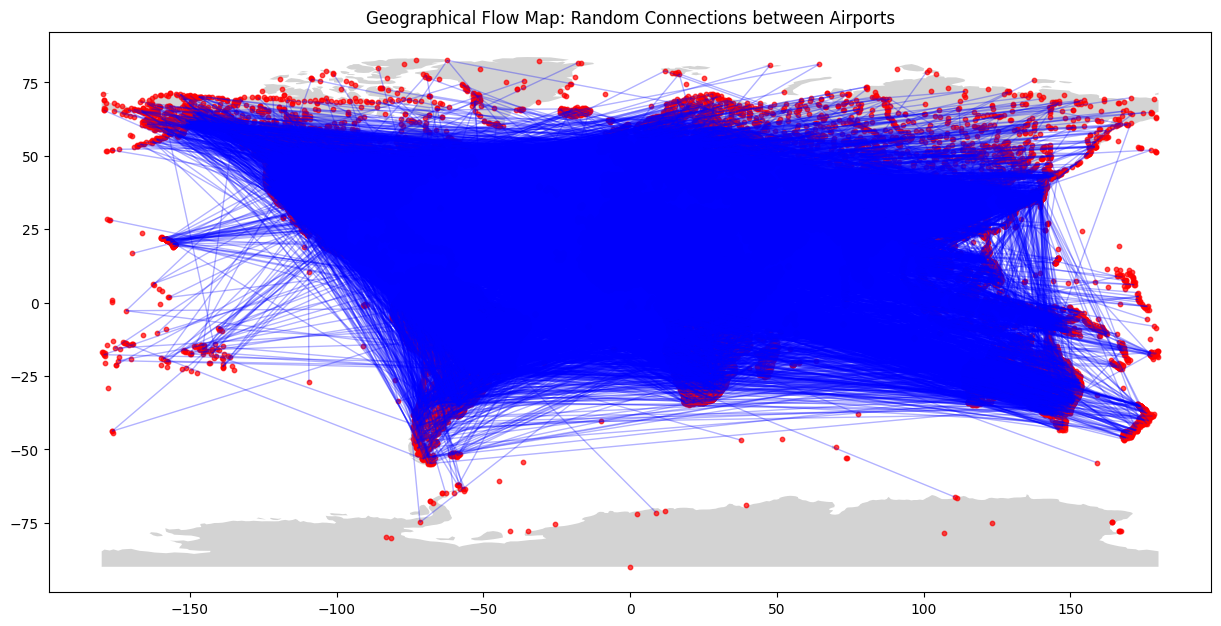

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt

# Read the airports dataset with latitude and longitude
airports = pd.read_csv('airports.csv')

# Filter out rows with missing or invalid latitude or longitude
airports = airports.dropna(subset=['latitude_deg', 'longitude_deg'])

# Create a GeoDataFrame with Point geometry
geometry = [Point(xy) for xy in zip(airports['longitude_deg'], airports['latitude_deg'])]
geo_airports = gpd.GeoDataFrame(airports, geometry=geometry)

# Generate random connections between airports
np.random.seed(42)
all_flows = []
for origin in airports['ident'].sample(frac=0.1):  # Sample 10% of airports for connections
    destinations = np.random.choice(airports['ident'].loc[airports['ident'] != origin], size=np.random.randint(1, 4), replace=False)
    flows = [{'origin': origin, 'destination': destination} for destination in destinations]
    all_flows.extend(flows)

# Create a GeoDataFrame with LineString geometry for all flows
geometry_all_flows = [LineString([geo_airports.loc[geo_airports['ident'] == flow['origin']].geometry.values[0],
                                  geo_airports.loc[geo_airports['ident'] == flow['destination']].geometry.values[0]])
                      for flow in all_flows]
geo_all_flows = gpd.GeoDataFrame(all_flows, geometry=geometry_all_flows)

# Load world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the geographical flow map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
geo_airports.plot(ax=ax, markersize=10, color='red', alpha=0.7)
geo_all_flows.plot(ax=ax, color='blue', linewidth=1, alpha=0.3)
plt.title('Geographical Flow Map: Random Connections between Airports')
plt.show()

<ipython-input-10-43a1c4443583>:35: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


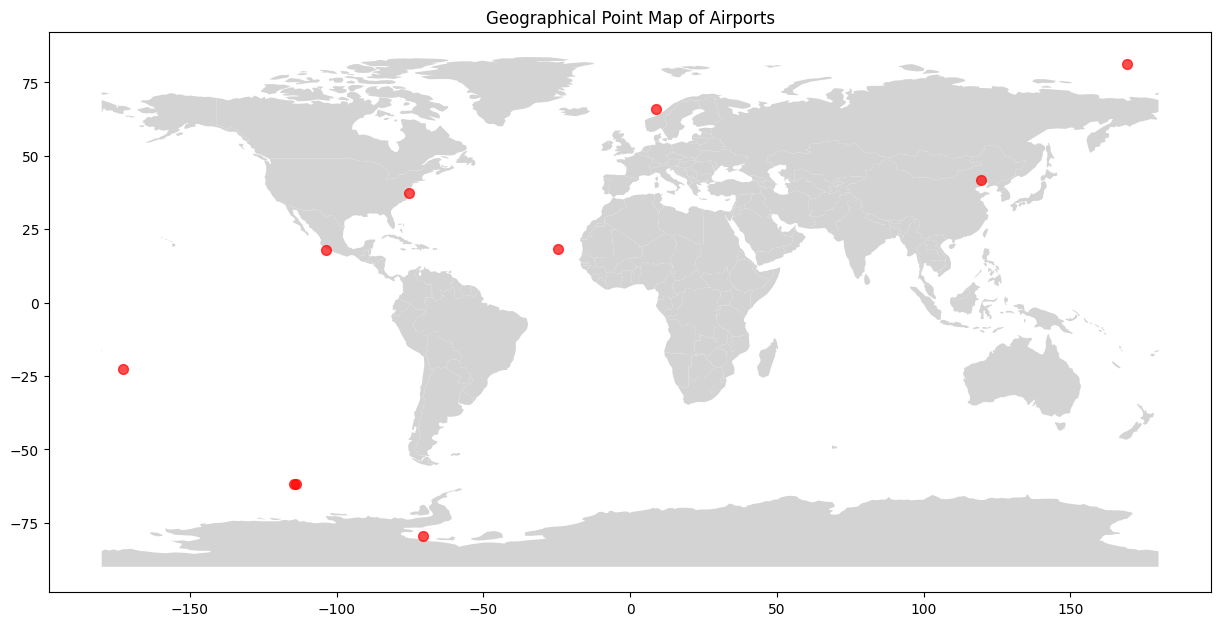

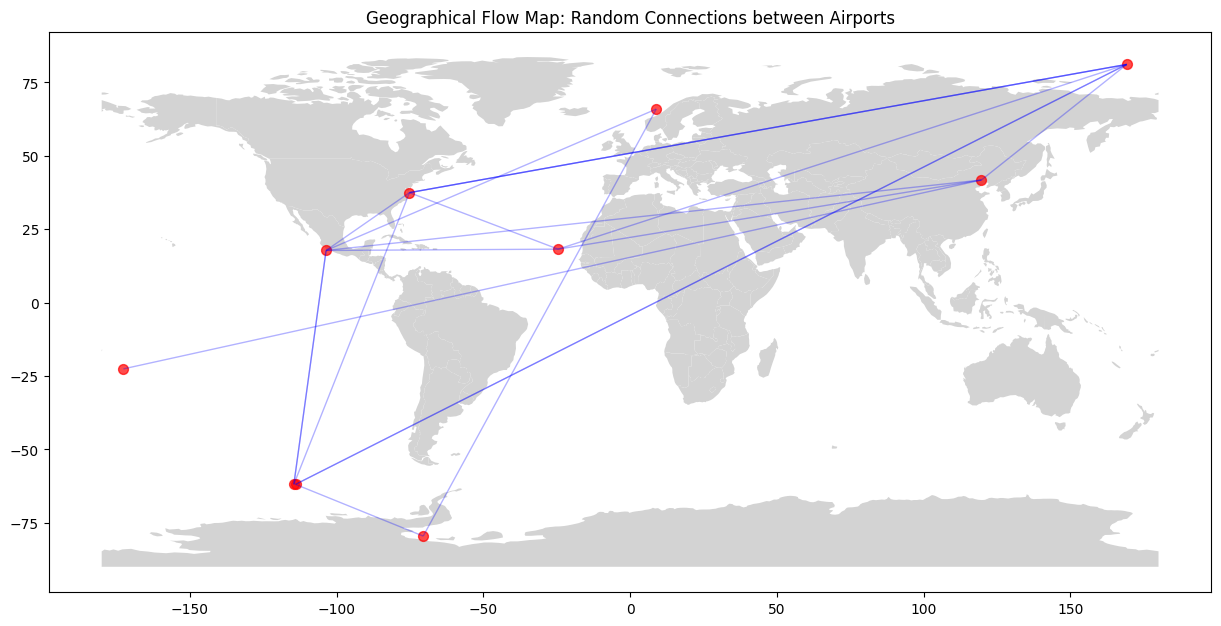

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt

# Generate a sample dataset with airports and connections
np.random.seed(42)

# Create airports DataFrame
airports_data = {
    'id': range(1, 11),
    'latitude_deg': np.random.uniform(-90, 90, 10),
    'longitude_deg': np.random.uniform(-180, 180, 10)
}
airports = pd.DataFrame(airports_data)

# Create connections DataFrame
connections_data = {
    'origin': np.random.choice(airports['id'], size=20),
    'destination': np.random.choice(airports['id'], size=20)
}
connections = pd.DataFrame(connections_data)

# Create GeoDataFrames with Point and LineString geometry
geometry_airports = [Point(xy) for xy in zip(airports['longitude_deg'], airports['latitude_deg'])]
geo_airports = gpd.GeoDataFrame(airports, geometry=geometry_airports)

geometry_connections = [LineString([geo_airports.loc[geo_airports['id'] == row['origin']].geometry.values[0],
                                    geo_airports.loc[geo_airports['id'] == row['destination']].geometry.values[0]])
                        for _, row in connections.iterrows()]
geo_connections = gpd.GeoDataFrame(connections, geometry=geometry_connections)

# Load world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot geographical point map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
geo_airports.plot(ax=ax, markersize=50, color='red', alpha=0.7)
plt.title('Geographical Point Map of Airports')
plt.show()

# Plot geographical flow map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
geo_airports.plot(ax=ax, markersize=50, color='red', alpha=0.7)
geo_connections.plot(ax=ax, color='blue', linewidth=1, alpha=0.3)
plt.title('Geographical Flow Map: Random Connections between Airports')
plt.show()